# [Natural Language Processing with Disaster Tweets](https://www.kaggle.com/c/nlp-getting-started/overview)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/NaturalLanguageProcessing/kaggle/Natural_Language_Processing_with_Disaster_Tweets

data  text-classification-BoW.ipynb


### 神经网络

In [ ]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-

import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

# 读取 CSV 文件并转成 Dataset
def load_dataset(path):
  data = pd.read_csv(path)
  return data # tf.data.Dataset.from_tensor_slices((x, y))

Version:  2.4.1
Eager mode:  True
Hub version:  0.12.0
GPU is available


In [ ]:
TRAIN_FILE_PATH='/content/drive/MyDrive/NaturalLanguageProcessing/kaggle/Natural_Language_Processing_with_Disaster_Tweets/data/train.csv'

# 读取文件
dataset = load_dataset(TRAIN_FILE_PATH)

In [ ]:
dataset

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
# 准备数据
data = dataset.text.values
label = np.array(dataset.target.values)

In [ ]:
data[:4]

array(['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
       'Forest fire near La Ronge Sask. Canada',
       "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
       '13,000 people receive #wildfires evacuation orders in California '],
      dtype=object)

In [ ]:
label[:4]

array([1, 1, 1, 1])

In [ ]:
# 划分训练集与测试集
train_examples, test_examples, train_labels, test_labels = train_test_split(data, label, test_size=0.3, random_state=42)

In [ ]:
vectorizer = CountVectorizer(min_df=5, stop_words=stop_words.ENGLISH_STOP_WORDS)
vec = vectorizer.fit(data)
train_vec = vec.transform(train_examples).toarray()
test_vec = vec.transform(test_examples).toarray()

In [ ]:
train_vec[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

In [ ]:
x_val = train_vec[:1000]
partial_x_train = train_vec[1000:]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/5
9/9 [==============================] - 3s 31ms/step - loss: 0.6750 - accuracy: 0.6177 - val_loss: 0.6147 - val_accuracy: 0.7590
Epoch 2/5
9/9 [==============================] - 0s 13ms/step - loss: 0.5598 - accuracy: 0.8345 - val_loss: 0.5459 - val_accuracy: 0.7800
Epoch 3/5
9/9 [==============================] - 0s 13ms/step - loss: 0.4644 - accuracy: 0.8471 - val_loss: 0.4962 - val_accuracy: 0.7810
Epoch 4/5
9/9 [==============================] - 0s 14ms/step - loss: 0.3821 - accuracy: 0.8649 - val_loss: 0.4746 - val_accuracy: 0.7850
Epoch 5/5
9/9 [==============================] - 0s 12ms/step - loss: 0.3266 - accuracy: 0.8828 - val_loss: 0.4737 - val_accuracy: 0.7880


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

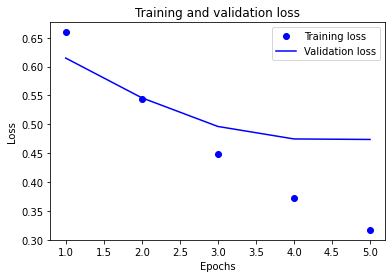

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

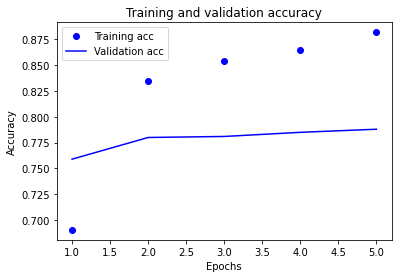

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()